In [1]:
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
import random

In [2]:
x=np.linspace(0,1,1001)  
deltaX=x[1]-x[0]
deltaX
hstep=deltaX/2
hstep

0.0005

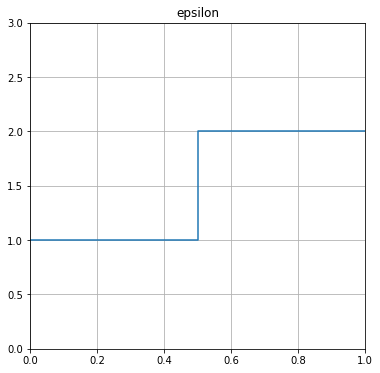

In [3]:
fig=plt.figure(figsize=(6,6))
ax=plt.axes()
ax.grid()
ax.set_ylim(0,3)
ax.set_xlim(0,1)
ax.set_title("epsilon")
plt.plot([0,0.5,0.5,1],[1,1,2,2])

In [4]:
diag=[]
for s in x:
    iphalf=s+hstep
    if iphalf<0.5:
        epsP=1
    else:
        epsP=2
    imhalf=s-hstep
    if imhalf<0.5:
        epsF=1
    else:
        epsF=2
    epsum=epsP+epsF
    diag.append(epsum)
#     print('step{}'.format(s))
#     print('epsum'.format(epsum))
#     print('--'*10)

In [5]:
set(diag)

{2, 3, 4}

In [6]:
x[:4]

array([0.   , 0.001, 0.002, 0.003])

In [7]:
#subdiagonal
subdiag=[]
for s in range(1,len(x)):   # because fisrt element of subdiagonal is omitted
    imhalf=x[s]-hstep
    if imhalf<0.5:
        epsF=1
    else:
        epsF=2
    subdiag.append(epsF)
#     print('step{}'.format(s))
#     print('imhalf{}'.format(imhalf))
#     print('eps{}'.format(epsF))
#     print('--'*10)

In [8]:
# super diagonal
supdiag=[]
for s in range(0,len(x)-1):   # because last element of super diagonal is omitted
    iphalf=x[s]+hstep
    if iphalf<0.5:
        epsF=1
    else:
        epsF=2
    supdiag.append(epsF)
#     print('step{}'.format(s))
#     print('imhalf{}'.format(imhalf))
#     print('eps{}'.format(epsF))
#     print('--'*10)

In [22]:
mat=-np.diag(diag)+np.diag(supdiag,k=1)+np.diag(subdiag,k=-1)
mat

array([[-2,  1,  0, ...,  0,  0,  0],
       [ 1, -2,  1, ...,  0,  0,  0],
       [ 0,  1, -2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -4,  2,  0],
       [ 0,  0,  0, ...,  2, -4,  2],
       [ 0,  0,  0, ...,  0,  2, -4]])

In [14]:
mat.shape

(1001, 1001)

## Lets define q(x)

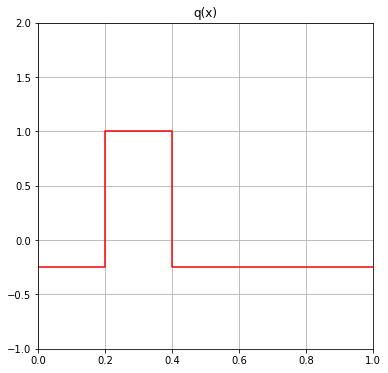

In [10]:
fig=plt.figure(figsize=(6,6))
ax=plt.axes()
ax.grid()
ax.set_ylim(-1,2)
ax.set_xlim(0,1)
ax.set_title("q(x)")
plt.plot([0,0.2,0.2,0.4,0.4,1],[-0.25,-0.25,1,1,-0.25,-0.25],color="red")


In [53]:
qlist=[]
for s in x:
    if s<=0.2:
        qlist.append(-0.25)
    elif s<=0.4:
        qlist.append(1)
    else:
        qlist.append(-0.25)
qlist=np.array(qlist)

In [54]:
set(qlist),len(qlist)

({-0.25, 1.0}, 1001)

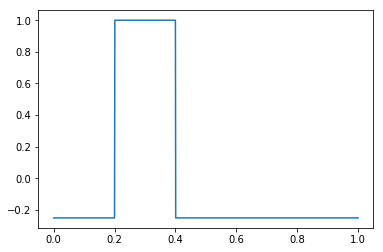

In [56]:
plt.plot(x,qlist)

## Lets represent our diff. equation as a system of equations in a matrix form

Mf=q which can be represented as, where M=mat,q=qlist

\begin{align}
\dfrac{1}{dx^2}
\begin{bmatrix}
    -(\epsilon_{1.5}+\epsilon_{0.5}) & \epsilon_{1.5} & 0 & \dots  & 0\\
    \epsilon_{1.5} & -(\epsilon_{2.5}+\epsilon_{1.5}) & \epsilon_{2.5} & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
   0 & 0 &0 & \dots  & -(\epsilon_{N+0.5}+\epsilon_{N-0.5})
\end{bmatrix}
*\begin{bmatrix}
           f_{1} \\
           f_{2} \\
           \vdots \\
           f_{N}
  \end{bmatrix}
=
\begin{bmatrix}
           q_{1} \\
           q_{2} \\
           \vdots \\
           q_{N}
  \end{bmatrix}
\end{align}

we can rewrite it as

\begin{align}
\begin{bmatrix}
    -(\epsilon_{1.5}+\epsilon_{0.5}) & \epsilon_{1.5} & 0 & \dots  & 0\\
    \epsilon_{1.5} & -(\epsilon_{2.5}+\epsilon_{1.5}) & \epsilon_{2.5} & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
   0 & 0 &0 & \dots  & -(\epsilon_{N+0.5}+\epsilon_{N-0.5})
\end{bmatrix}
*\begin{bmatrix}
           f_{1} \\
           f_{2} \\
           \vdots \\
           f_{N}
  \end{bmatrix}
=
\begin{bmatrix}
           q_{1} \\
           q_{2} \\
           \vdots \\
           q_{N}
  \end{bmatrix}
  *dx^2
\end{align}

In [29]:
x[999],x[1000]

(0.999, 1.0)

In [31]:
qlist[999],qlist[1000]

(-0.25, -0.25)

# boundary conditions

###  for i=1


$ \dfrac{1}{\triangle x^2}[\epsilon_{1.5}f_{2}-(\epsilon_{1.5}+\epsilon_{0.5})f_{1}+\epsilon_{0.5}f_{0}]=q_{1} $. 
	<br>But $ \dfrac{f_{0}+f{1}}{2}=f_{1,bc} => f_{0}=2*f_{1,bc}-f_{1}$.<br>
	<br>Then first row can be rewritten as: <br>
	$ \dfrac{1}{\triangle x^2}[\epsilon_{1.5}f_{2}-(\epsilon_{1.5}+\epsilon_{0.5})f_{1}+\epsilon_{0.5}(2*f_{1,bc}-f_{1})]=q_{1} $ => <br>
	$ \dfrac{1}{\triangle x^2}[\epsilon_{1.5}f_{2}-(\epsilon_{1.5}+2\epsilon_{0.5})f_{1}]+\dfrac{2\epsilon_{0.5}f_{1,bc}}{\triangle x^2}=q_{1} $ or<br> $ \dfrac{1}{\triangle x^2}[\epsilon_{1.5}f_{2}-(\epsilon_{1.5}+2\epsilon_{0.5})f_{1}]=q_{1}-\dfrac{2\epsilon_{0.5}f_{1,bc}}{\triangle x^2}$

## for i=N 

$ \dfrac{1}{\triangle x^2}[\epsilon_{N+0.5}f_{N+1}-(\epsilon_{N+0.5}+\epsilon_{N-0.5})f_{N}+\epsilon_{N-0.5}f_{N-1}]=q_{N} $. 
	<br>But $ \dfrac{f_{N}+f_{N+1}}{2}=f_{2,bc} => f_{N+1}=2*f_{2,bc}-f_{N}$.
	<br>Then first row can be rewritten as:<br> 
	$ \dfrac{1}{\triangle x^2}[\epsilon_{N+0.5}(2*f_{2,bc}-f_{N})-(\epsilon_{N+0.5}+\epsilon_{N-0.5})f_{N}+\epsilon_{N-0.5}f_{N-1}]=q_{N} $ => <br>
	$ \dfrac{1}{\triangle x^2}[-(2\epsilon_{N+0.5}+\epsilon_{N-0.5})f_{N}+\epsilon_{N-0.5}f_{N-1}]+\dfrac{2\epsilon_{N+0.5}f_{2,bc}}{\triangle x^2}=q_{N} $ or
    <br>$ \dfrac{1}{\triangle x^2}[-(2\epsilon_{N+0.5}+\epsilon_{N-0.5})f_{N}+\epsilon_{N-0.5}f_{N-1}]=q_{N}-\dfrac{2\epsilon_{N+0.5}f_{2,bc}}{\triangle x^2}$

Than Mf=q changes to <br>
$M_{mod}f=q_{mod}+q_{BC}$ <br>
$M_{mod}f=q*\triangle x^2+q_{BC}$ 

\begin{align}
\begin{bmatrix}
    -(\epsilon_{1.5}+2\epsilon_{0.5}) & \epsilon_{1.5} & 0 & \dots  & 0\\
    \epsilon_{1.5} & -(\epsilon_{2.5}+\epsilon_{1.5}) & \epsilon_{2.5} & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
   0 & 0  & \dots  & \epsilon_{N-0.5}&  -(2\epsilon_{N+0.5}+\epsilon_{N-0.5})
\end{bmatrix}
*\begin{bmatrix}
           f_{1} \\
           f_{2} \\
           \vdots \\
           f_{N}
  \end{bmatrix}
=
\begin{bmatrix}
           q_{1} \\
           q_{2} \\
           \vdots \\
           q_{N}
  \end{bmatrix}
  *\triangle x^2 + 
  \begin{bmatrix}
           -2\epsilon_{0.5}f_{1,bc} \\
           0 \\
           \vdots \\
           -2\epsilon_{N+0.5}f_{2,bc}
  \end{bmatrix}
\end{align}

$q_{M}=q*\triangle x^2+q_{BC}$ 

In [69]:
qBC=np.zeros(len(qlist))
f1bc=0  #Boundary condition 1
f2bc=0  # Boundary condition 2 
qBC[0]=-2*1*f1bc
qBC[-1]=-2*1*f2bc

In [70]:
qlistM=qlist*deltaX**2+qBC

$q_{M}$=qlistM

In [71]:
qlistM

array([-2.5e-07, -2.5e-07, -2.5e-07, ..., -2.5e-07, -2.5e-07, -2.5e-07])

In [72]:
set(qlistM),len(qlistM)

({-2.5e-07, 1e-06}, 1001)

$M_{mod}$=matMOD

In [75]:
matMOD=mat

In [79]:
matMOD[0][0]=-3
matMOD[-1][-1]=-6
matMOD

array([[-3,  1,  0, ...,  0,  0,  0],
       [ 1, -2,  1, ...,  0,  0,  0],
       [ 0,  1, -2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -4,  2,  0],
       [ 0,  0,  0, ...,  2, -4,  2],
       [ 0,  0,  0, ...,  0,  2, -6]])

Now we can rewrite our system of equations as <br>
$M_{mod}f=qM$

In [83]:
f=LA.solve(matMOD,qlistM)

In [86]:
f

array([-2.27480436e-05, -6.84941309e-05, -1.14490218e-04, ...,
        5.68076091e-05,  3.41845654e-05,  1.14365218e-05])

In [88]:
f.shape

(1001,)

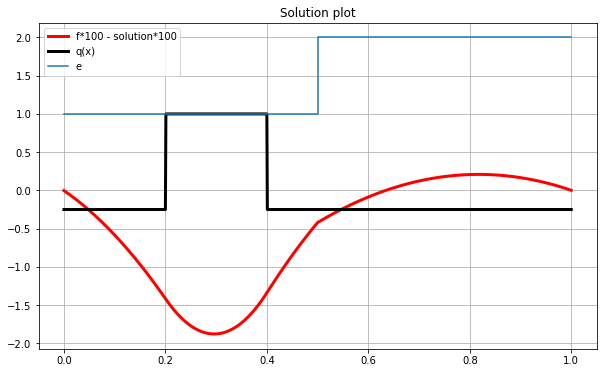

In [131]:
fig=plt.figure(figsize=(10,6))
ax=plt.axes()
ax.grid()
ax.plot(x,f*100,color="red",linewidth=3,label="f*100 - solution*100")
ax.plot(x,qlist,linewidth=3,color="black",label="q(x)")   
ax.plot([0,0.5,0.5,1],np.array([1,1,2,2]),label="e")  
ax.set_title("Solution plot")
ax.legend()
plt.show()